<a href="https://colab.research.google.com/github/PriyeshDave/TMLC/blob/main/Unsupervised_Learning/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [38]:
dataset = pd.read_csv('../Datasets/SanFranSalary.csv')

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
dataset.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [40]:
dataset1['Status'].value_counts()

FT    22334
PT    15785
Name: Status, dtype: int64

In [41]:
dataset1['Status'].isnull().sum()

110535

# Exploratory Data Analysis

In [4]:
dataset.shape

(148654, 13)

In [5]:
dataset.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [6]:
dataset.drop(['Benefits', 'Status','Notes'], axis=1, inplace=True)

In [7]:
dataset.isnull().sum()

Id                    0
EmployeeName          0
JobTitle              0
BasePay             605
OvertimePay           0
OtherPay              0
TotalPay              0
TotalPayBenefits      0
Year                  0
Agency                0
dtype: int64

In [8]:
dataset.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,326373.19,2011,San Francisco


In [9]:
dataset['JobTitle'].value_counts()

Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: JobTitle, Length: 2159, dtype: int64

In [10]:
dataset['EmployeeName'].value_counts()

Kevin Lee                   13
Richard Lee                 11
Steven Lee                  11
William Wong                11
Stanley Lee                  9
                            ..
Jeffrey Skover               1
Ken Dever                    1
Kevin Whitfield              1
Granville McCollough III     1
Joe Lopez                    1
Name: EmployeeName, Length: 110811, dtype: int64

In [11]:
dataset.drop(['EmployeeName', 'Id', 'Agency'], axis=1, inplace=True)

In [12]:
dataset.head()

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,326373.19,2011


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148654 non-null  object 
 1   BasePay           148049 non-null  object 
 2   OvertimePay       148654 non-null  object 
 3   OtherPay          148654 non-null  object 
 4   TotalPay          148654 non-null  float64
 5   TotalPayBenefits  148654 non-null  float64
 6   Year              148654 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 7.9+ MB


In [14]:
dataset['BasePay']

0            167411.18
1            155966.02
2            212739.13
3              77916.0
4             134401.6
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653            0.00
Name: BasePay, Length: 148654, dtype: object

##### Base Pay, OvertimePay and OtherPay has string values as well

In [15]:
def cleanData(value):
  if isinstance(value, str):
    return None
  else: 
    return value

In [16]:
def seeStringValues(feature):
  series = dataset[feature].apply(cleanData)
  print('{} has {} string values'.format(feature, series.isnull().sum()))

In [17]:
for feature in ['BasePay', 'OvertimePay', 'OtherPay']:
  seeStringValues(feature)

BasePay has 18187 string values
OvertimePay has 17582 string values
OtherPay has 17582 string values


In [18]:
for feature in ['BasePay', 'OvertimePay', 'OtherPay']:
  dataset[feature] = dataset[feature].apply(cleanData)
  dataset.fillna(np.mean(dataset[feature]), inplace=True)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148654 non-null  object 
 1   BasePay           148654 non-null  float64
 2   OvertimePay       148654 non-null  float64
 3   OtherPay          148654 non-null  float64
 4   TotalPay          148654 non-null  float64
 5   TotalPayBenefits  148654 non-null  float64
 6   Year              148654 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.9+ MB


In [20]:
dataset.isnull().sum()

JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [21]:
dataset.head()

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011


## Encoding Data

In [22]:
dataset['JobTitle'].nunique()

2159

In [23]:
JobTitle = pd.get_dummies(dataset['JobTitle'])
Year = pd.get_dummies(dataset['Year'])

In [24]:
dataset.drop(['JobTitle','Year'], axis=1, inplace=True)
dataset = pd.concat([JobTitle, dataset, Year], axis=1)

In [25]:
dataset.head()

,ACCOUNT CLERK,ACCOUNTANT,ACCOUNTANT INTERN,"ACPO,JuvP, Juv Prob (SFERS)",ACUPUNCTURIST,ADMINISTRATIVE ANALYST,ADMINISTRATIVE ANALYST II,ADMINISTRATIVE ANALYST III,ADMINISTRATIVE ENGINEER,ADMINISTRATIVE SERVICES MANAGER,...,ZOO CURATOR,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,2011,2012,2013,2014
0,0,0,0,0,0,0,0,0,0,0,...,0,167411.18,0.00,400184.25,567595.43,567595.43,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,155966.02,245131.88,137811.38,538909.28,538909.28,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,212739.13,106088.18,16452.60,335279.91,335279.91,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,77916.00,56120.71,198306.90,332343.61,332343.61,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,134401.60,9737.00,182234.59,326373.19,326373.19,1,0,0,0


In [26]:
dataset.shape

(148654, 2168)

# PCA

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()
scaled_data = ss.fit_transform(dataset)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [29]:
scaled_data

array([[-0.02363589, -0.00579968, -0.01797225, ..., -0.57323333,
        -0.58193329, -0.58728848],
       [-0.02363589, -0.00579968, -0.01797225, ..., -0.57323333,
        -0.58193329, -0.58728848],
       [-0.02363589, -0.00579968, -0.01797225, ..., -0.57323333,
        -0.58193329, -0.58728848],
       ...,
       [-0.02363589, -0.00579968, -0.01797225, ..., -0.57323333,
        -0.58193329,  1.70274069],
       [-0.02363589, -0.00579968, -0.01797225, ..., -0.57323333,
        -0.58193329,  1.70274069],
       [-0.02363589, -0.00579968, -0.01797225, ..., -0.57323333,
        -0.58193329,  1.70274069]])

In [30]:
pca = PCA().fit(scaled_data)

In [31]:
len(pca.explained_variance_ratio_)

2168

In [32]:
pca.explained_variance_ratio_

array([1.86501097e-03, 1.06593998e-03, 7.32168616e-04, ...,
       1.65965103e-28, 1.79450904e-29, 2.93172476e-33])

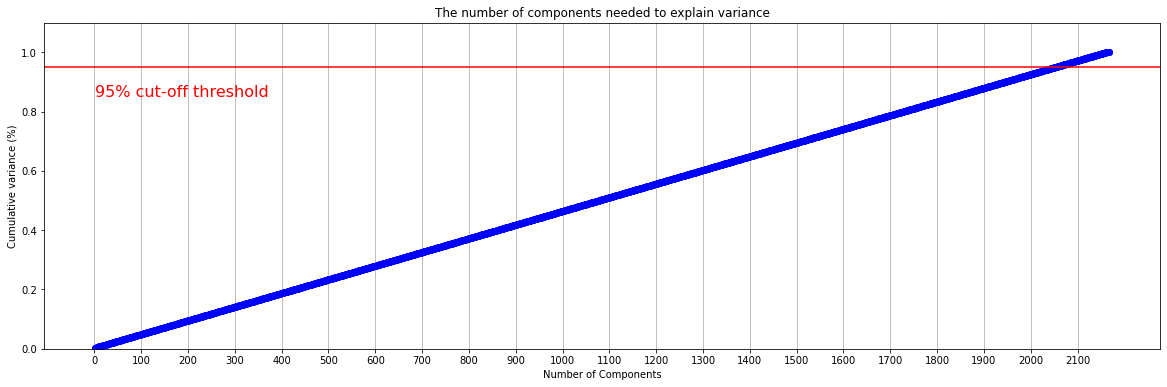

In [33]:
plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 2169, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 2168, step=100)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [34]:
px.line(x= np.arange(1, 2169, step=1), y = np.cumsum(pca.explained_variance_ratio_)).show()